In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
df = pd.read_csv('train.csv')
df.head()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,9580,0.668999,58,2,0.449504,3425.0,9,1,1,1,1.0,0
1,39755,0.015922,71,0,6.000000,NaN,5,0,0,0,0.0,0
2,118799,0.183062,52,1,0.035593,5000.0,9,0,0,0,0.0,0
3,16489,0.162301,77,0,0.227886,2000.0,8,0,0,0,0.0,0
4,149857,0.404199,30,0,0.026010,5843.0,4,0,0,0,0.0,0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    105000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  105000 non-null  float64
 2   Age                                   105000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  105000 non-null  int64  
 4   DebtRatio                             105000 non-null  float64
 5   MonthlyIncome                         84164 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       105000 non-null  int64  
 7   NumberOfTimes90DaysLate               105000 non-null  int64  
 8   NumberRealEstateLoansOrLines          105000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  105000 non-null  int64  
 10  NumberOfDependents                    102236 non-null  float64
 11  

In [211]:
df.describe()

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
count,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,8.416400e+04,105000.000000,105000.000000,105000.000000,105000.000000,102236.000000,105000.000000
mean,75006.458152,5.378324,52.325610,0.409352,352.044192,6.703641e+03,8.459952,0.254619,1.019010,0.228762,0.757933,0.066514
std,43315.742022,201.573457,14.766425,4.056717,1820.229318,1.622288e+04,5.134329,4.032506,1.131065,4.017864,1.115273,0.249180
min,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37590.750000,0.029974,41.000000,0.000000,0.174950,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74941.500000,0.154252,52.000000,0.000000,0.366061,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,112542.500000,0.556035,63.000000,0.000000,0.870083,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000
max,149999.000000,29110.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,1.000000


In [212]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.933486
1    0.066514
Name: proportion, dtype: float64

In [213]:
print((df['MonthlyIncome'].isnull().sum())/(len(df['MonthlyIncome']))*100) #porcentaje de los valores NaN en la columna MonthlyIncome

19.843809523809526


In [214]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

cols_to_use = ['RevolvingUtilizationOfUnsecuredLines', 'Age', 'NumberOfTime30-59DaysPastDueNotWorse',
               'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
               'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

df_impute = df[cols_to_use]

# Escalar las variables (muy importante para KNN)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_impute), columns=cols_to_use)

imputer = KNNImputer(n_neighbors=5)

# Imputar los valores faltantes
df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=cols_to_use)

# Volver a escala original
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=cols_to_use)

# Reemplazar en el DataFrame original
df[cols_to_use] = df_imputed

KeyboardInterrupt: 

In [207]:
def preprocess(df):
    df = df.copy()

    df["RevolvingUtilizationOfUnsecuredLines"] = df["RevolvingUtilizationOfUnsecuredLines"].clip(upper=1)

    df["TotalPastDue"] = (
        df["NumberOfTime30-59DaysPastDueNotWorse"] +
        df["NumberOfTime60-89DaysPastDueNotWorse"] +
        df["NumberOfTimes90DaysLate"]
    )

    df["IncomePerDependent"] = df["MonthlyIncome"] / (df["NumberOfDependents"] + 1)
    df["IncomeToDebtRatio"] = df["MonthlyIncome"] / (df["DebtRatio"] + 1e-5)
    df["AgeBin"] = pd.cut(df["Age"], bins=[0, 25, 35, 50, 65, 120], labels=False)
    df["HasDependents"] = (df["NumberOfDependents"] > 0).astype(int)

    # Log transforms para estabilizar distribución
    df["LogMonthlyIncome"] = np.log1p(df["MonthlyIncome"])
    df["LogDebtRatio"] = np.log1p(df["DebtRatio"])
    df["LogUtilization"] = np.log1p(df["RevolvingUtilizationOfUnsecuredLines"])

    df["PastDueWeighted"] = (
        df["NumberOfTime30-59DaysPastDueNotWorse"] * 1 +
        df["NumberOfTime60-89DaysPastDueNotWorse"] * 2 +
        df["NumberOfTimes90DaysLate"] * 3
    )
    df["HasSeriousLate"] = (df["NumberOfTimes90DaysLate"] > 0).astype(int)
    df["DebtPerCreditLine"] = df["DebtRatio"] / (df["NumberOfOpenCreditLinesAndLoans"] + 1)
    df["RealEstateToCreditRatio"] = df["NumberRealEstateLoansOrLines"] / (df["NumberOfOpenCreditLinesAndLoans"] + 1)
    df["IncomeAge"] = df["MonthlyIncome"] * df["Age"]

    return df



In [160]:
df = preprocess(df)

In [161]:
df

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerDependent,IncomeToDebtRatio,AgeInverse,AgeBin,RealEstateToCreditRatio,DebtPerCreditLine,HasDependents,LogMonthlyIncome,LogDebtRatio,LogUtilization
0,9580,0.668999,58.0,2.0,0.449504,3425.0,9.0,1.0,1.0,1.0,...,1712.5,7619.343473,0.016949,3,0.100000,0.044950,1,8.139149,0.371221,0.512224
1,39755,0.015922,71.0,0.0,6.000000,5262.4,5.0,0.0,0.0,0.0,...,5262.4,877.065205,0.013889,4,0.000000,1.000000,0,8.568532,1.945910,0.015796
2,118799,0.183062,52.0,1.0,0.035593,5000.0,9.0,0.0,0.0,0.0,...,5000.0,140438.072975,0.018868,3,0.000000,0.003559,0,8.517393,0.034974,0.168106
3,16489,0.162301,77.0,0.0,0.227886,2000.0,8.0,0.0,0.0,0.0,...,2000.0,8775.930687,0.012821,4,0.000000,0.025321,0,7.601402,0.205294,0.150401
4,149857,0.404199,30.0,0.0,0.026010,5843.0,4.0,0.0,0.0,0.0,...,5843.0,224561.639768,0.032258,1,0.000000,0.005202,0,8.673171,0.025677,0.339467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,79500,0.842886,33.0,0.0,0.182561,9300.0,10.0,0.0,0.0,0.0,...,4650.0,50939.082526,0.029412,1,0.000000,0.016596,1,9.137877,0.167682,0.611333
104996,84928,0.805186,68.0,0.0,0.229466,5429.0,7.0,0.0,0.0,0.0,...,5429.0,23658.254702,0.014493,4,0.000000,0.028683,0,8.599694,0.206580,0.590664
104997,56301,0.811494,51.0,2.0,3.709314,3016.0,26.0,0.0,4.0,0.0,...,3016.0,813.086183,0.019231,3,0.148148,0.137382,0,8.012018,1.549542,0.594152
104998,41912,0.412590,62.0,1.0,0.173290,14166.0,7.0,1.0,1.0,0.0,...,14166.0,81742.623949,0.015873,3,0.125000,0.021661,0,9.558671,0.159812,0.345425


In [170]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

X = df.drop(columns=["SeriousDlqin2yrs","ID"], axis=1)
y = df["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [171]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [8, 10, 12, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid_rf,
                           cv=5,  
                           scoring='roc_auc',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score ROC AUC:", grid_search.best_score_)

Mejores parámetros: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Mejor score ROC AUC: 0.8592497374071225


In [181]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum()  # Para clases desbalanceadas
)

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
}



In [182]:
grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

print(grid_search_xgb.best_score_)
print(grid_search_xgb.best_params_)

c:\Users\yanju\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [19:16:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.8635652467215642
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [183]:
best_rf = grid_search.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

In [200]:
df_test = pd.read_csv('test.csv')
df_test

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,129460,1.000000,21,0,8.000000,NaN,0,0,0,0,NaN
1,134018,0.009878,38,0,0.229978,10500.0,10,0,1,0,1.0
2,86523,0.276836,70,0,1914.000000,NaN,23,0,1,0,0.0
3,138466,0.045413,75,0,452.000000,NaN,4,0,0,0,0.0
4,143905,0.000000,82,0,0.000000,NaN,5,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
44995,124596,0.055997,70,0,51.000000,NaN,2,0,0,0,0.0
44996,75895,1.000000,62,0,2796.000000,NaN,5,0,1,0,3.0
44997,92453,0.673065,56,1,0.511132,7500.0,9,0,2,0,4.0
44998,139288,1.000000,22,0,0.000000,2500.0,0,0,0,0,0.0


In [204]:
df_impute = df_test[cols_to_use]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_impute), columns=cols_to_use)

imputer = KNNImputer(n_neighbors=5)


df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_scaled), columns=cols_to_use)


df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed_scaled), columns=cols_to_use)


df_test[cols_to_use] = df_imputed

df_test = preprocess(df_test)

In [205]:
df_test

,ID,RevolvingUtilizationOfUnsecuredLines,Age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,IncomePerDependent,IncomeToDebtRatio,AgeInverse,AgeBin,RealEstateToCreditRatio,DebtPerCreditLine,HasDependents,LogMonthlyIncome,LogDebtRatio,LogUtilization
0,129460,1.000000,21.0,0.0,8.000000,910.0,0.0,0.0,0.0,0.0,...,910.00,1.137499e+02,0.045455,0.0,0.000000,8.000000,0,6.814543,2.197225,0.693147
1,134018,0.009878,38.0,0.0,0.229978,10500.0,10.0,0.0,1.0,0.0,...,5250.00,4.565454e+04,0.025641,2.0,0.090909,0.020907,1,9.259226,0.206996,0.009829
2,86523,0.276836,70.0,0.0,1914.000000,7392.0,23.0,0.0,1.0,0.0,...,7392.00,3.862069e+00,0.014085,4.0,0.041667,79.750000,0,8.908289,7.557473,0.244385
3,138466,0.045413,75.0,0.0,452.000000,1761.8,4.0,0.0,0.0,0.0,...,1761.80,3.897788e+00,0.013158,4.0,0.000000,90.400000,0,7.474659,6.115892,0.044412
4,143905,0.000000,82.0,0.0,0.000000,2556.0,5.0,0.0,0.0,0.0,...,2556.00,2.556000e+08,0.012048,4.0,0.000000,0.000000,0,7.846590,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,124596,0.055997,70.0,0.0,51.000000,3250.0,2.0,0.0,0.0,0.0,...,3250.00,6.372548e+01,0.014085,4.0,0.000000,17.000000,0,8.086718,3.951244,0.054485
44996,75895,1.000000,62.0,0.0,2796.000000,8743.4,5.0,0.0,1.0,0.0,...,2185.85,3.127110e+00,0.015873,3.0,0.166667,466.000000,1,9.076169,7.936303,0.693147
44997,92453,0.673065,56.0,1.0,0.511132,7500.0,9.0,0.0,2.0,0.0,...,1500.00,1.467303e+04,0.017544,3.0,0.200000,0.051113,1,8.922792,0.412859,0.514658
44998,139288,1.000000,22.0,0.0,0.000000,2500.0,0.0,0.0,0.0,0.0,...,2500.00,2.500000e+08,0.043478,0.0,0.000000,0.000000,0,7.824446,0.000000,0.693147


In [206]:
pred_rf = best_rf.predict(df_test.drop(columns=['ID']))

pred_xgb = best_xgb.predict(df_test.drop(columns=['ID']))

In [186]:
entrega_xgb = df_test[['ID']]
entrega_xgb['SeriousDlqin2yrs'] = pred_xgb
entrega_xgb.to_csv('entrega_xgb.csv',index=False)

C:\Users\yanju\AppData\Local\Temp\ipykernel_22636\4076644644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entrega_xgb['SeriousDlqin2yrs'] = pred_xgb


In [189]:
best_xgb.feature_importances_

array([0.14321657, 0.03026803, 0.01083087, 0.016427  , 0.01866367,
       0.02043147, 0.07357595, 0.04097338, 0.04455692, 0.01224561,
       0.5291313 , 0.01232799, 0.01999403, 0.        , 0.        ,
       0.01565528, 0.01170198, 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

                                 feature  importance
10                          TotalPastDue    0.529131
0   RevolvingUtilizationOfUnsecuredLines    0.143217
6                NumberOfTimes90DaysLate    0.073576
8   NumberOfTime60-89DaysPastDueNotWorse    0.044557
7           NumberRealEstateLoansOrLines    0.040973
1                                    Age    0.030268
5        NumberOfOpenCreditLinesAndLoans    0.020431
12                     IncomeToDebtRatio    0.019994
4                          MonthlyIncome    0.018664
3                              DebtRatio    0.016427
15               RealEstateToCreditRatio    0.015655
11                    IncomePerDependent    0.012328
9                     NumberOfDependents    0.012246
16                     DebtPerCreditLine    0.011702
2   NumberOfTime30-59DaysPastDueNotWorse    0.010831
14                                AgeBin    0.000000
13                            AgeInverse    0.000000
17                         HasDependents    0.

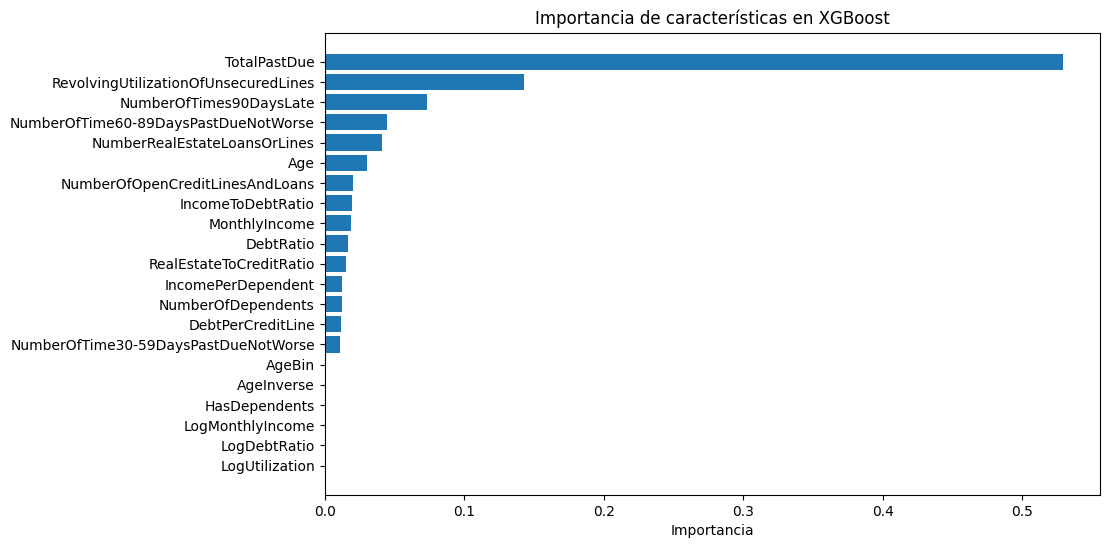

In [194]:
importances = best_xgb.feature_importances_

cols = ['RevolvingUtilizationOfUnsecuredLines', 'Age', 'NumberOfTime30-59DaysPastDueNotWorse',
        'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
        'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
        'TotalPastDue', 'IncomePerDependent', 'IncomeToDebtRatio', 'AgeInverse', 'AgeBin',
        'RealEstateToCreditRatio', 'DebtPerCreditLine', 'HasDependents', 'LogMonthlyIncome',
        'LogDebtRatio', 'LogUtilization']

feat_imp_df = pd.DataFrame({
    'feature': cols,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp_df)

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de características en XGBoost')
plt.show()

                                 feature  importance
10                          TotalPastDue    0.247153
0   RevolvingUtilizationOfUnsecuredLines    0.177650
20                        LogUtilization    0.170478
6                NumberOfTimes90DaysLate    0.095097
2   NumberOfTime30-59DaysPastDueNotWorse    0.090799
8   NumberOfTime60-89DaysPastDueNotWorse    0.048280
13                            AgeInverse    0.024536
1                                    Age    0.022087
5        NumberOfOpenCreditLinesAndLoans    0.014414
12                     IncomeToDebtRatio    0.014055
3                              DebtRatio    0.013647
19                          LogDebtRatio    0.013524
16                     DebtPerCreditLine    0.010996
7           NumberRealEstateLoansOrLines    0.009845
4                          MonthlyIncome    0.009609
18                      LogMonthlyIncome    0.009605
14                                AgeBin    0.009186
11                    IncomePerDependent    0.

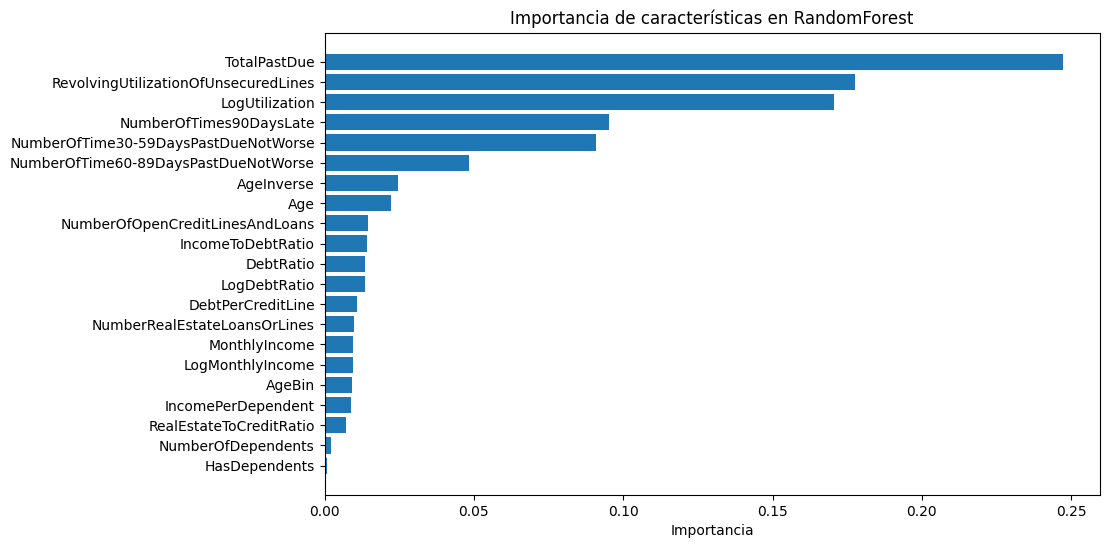

In [196]:
importances = best_rf.feature_importances_

feat_imp_df = pd.DataFrame({
    'feature': cols,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feat_imp_df)

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de características en RandomForest')
plt.show()